# 1. 손 글씨 숫자 데이터셋
손글씨 숫자 데이터셋은 0부터 9까지의 숫자를 손글씨로 쓴 흑백 이미지로 구성되어 있으며, 각 이미지는 8x8 픽셀 크기의 64차원 벡터로 표현됩니다. 각 픽셀 값은 0(흰색)에서 16(검은색)까지의 명암값을 가집니다. 이 데이터는 총 1797개의 샘플로 이루어져 있으며, 각 샘플에는 숫자 클래스(0~9)가 레이블로 붙어 있습니다. 주로 분류 알고리즘을 학습시키거나 데이터 시각화, 차원 축소 기법 등을 실험하는 데 사용됩니다.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader # 핵심!!
digits = load_digits()

X_data = digits['data']
y_data = digits['target']
# 검정색 바탕에 흰 글씨로 되어 있을 것. 1797개 있다.

print(X_data) # 이미지 자체
print(y_data) #정답

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

손글씨 데이터

In [4]:
print(X_data.shape)
print(y_data.shape)

(1797, 64)
(1797,)




### ※ axes.flatten()

axes.flatten()은 다차원 배열 형태로 구성된 Matplotlib의 서브플롯 배열을 1차원 배열로 변환하는 메서드입니다. Matplotlib에서 다수의 서브플롯을 생성할 때, plt.subplots()는 2차원 배열 형태로 서브플롯 객체를 반환합니다. 이 배열은 각 서브플롯을 접근하기 위해 행과 열의 인덱스를 사용해야 하지만, flatten() 메서드를 사용하면 이 배열을 1차원으로 펼쳐서 각 서브플롯을 단일 인덱스로 순회할 수 있게 됩니다.

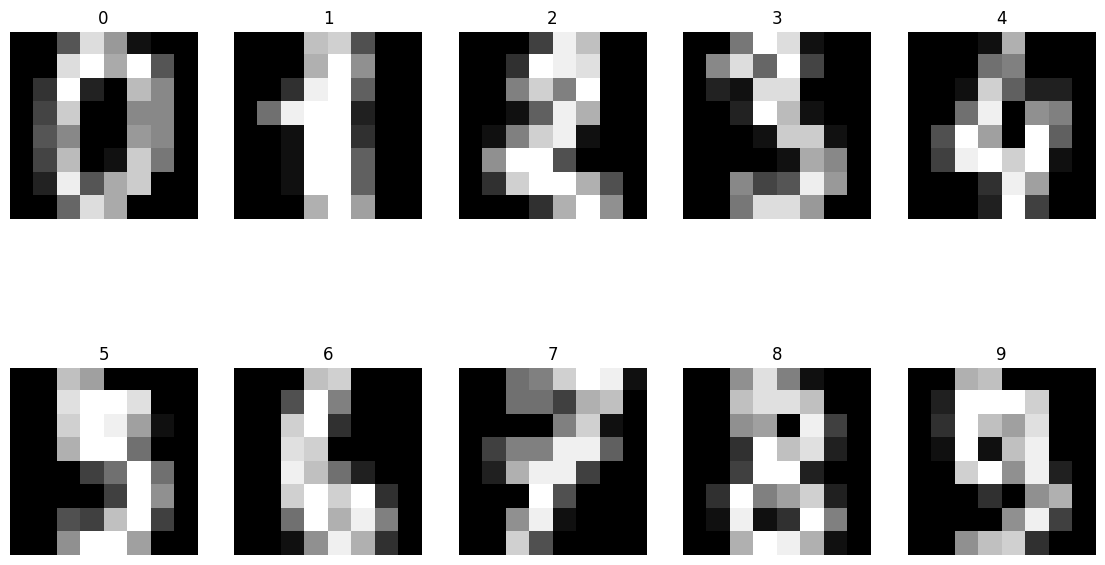

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))
# 2개의 행, 5개의 열, 전체 도화지 사이즈

# axes.flatten() : 한 줄로 평평하게 해주세요! 일단 한 열로 만들어주세요!
# 그래서 이중이 아니라 그냥 for문으로 돌릴 수 있음
for i, ax in enumerate(axes.flatten()):
    # ax.imshow : 화면에 이미지를 보여줘라. reshape((8, 8)) : 1열로 되어있는 걸 8,8로 바꿔줘라.
    ax.imshow(X_data[i].reshape((8, 8)), cmap='gray')
    ax.set_title(y_data[i])
    ax.axis('off')

In [6]:
X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data)

print(X_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


# 2. 데이터 로더
데이터로더(Data Loader)는 데이터셋을 효율적으로 관리하고, 모델 학습 과정에서 데이터를 쉽게 가져올 수 있도록 도와주는 도구입니다. 일반적으로 데이터셋을 배치(batch) 단위로 나누어 모델에 제공하며, 데이터의 크기가 클 경우에도 메모리 효율적으로 처리할 수 있도록 설계되었습니다. 데이터 증강, 셔플링, 병렬 처리와 같은 기능을 지원하여 학습 성능을 향상시키고, 모델 학습과 평가 시 일관된 데이터 제공 방식을 유지합니다. 딥러닝 프레임워크에서는 PyTorch의 DataLoader나 TensorFlow의 tf.data 같은 도구를 통해 쉽게 사용할 수 있습니다.

### ※ 데이터로더의 주요 역할

1. 배치 처리: 데이터를 지정된 크기의 배치로 나누어 모델에 제공.
2. 셔플링: 데이터 순서를 무작위로 섞어 과적합 방지.
3. 병렬 처리: num_workers 옵션을 통해 데이터를 병렬로 로드하여 속도 향상.
4. 반복 처리: 학습 epoch 동안 데이터를 자동으로 반복해서 제공.

In [8]:
loader = DataLoader(
    # 1. 데이터셋을 넣어줄건데, 리스트 형식으로 넣어주기.
    # 튜플로 제공할건데, 이미지와 정답을 함께 제공할 것.
    dataset=list(zip(x_train, y_train)),
    # 2. 보통은 2의 n승. (1437개 / 64 = 22번...29개 )
    batch_size=64, # 하나의 배치에 들어가는 개수
    shuffle = True,
    drop_last=False
)

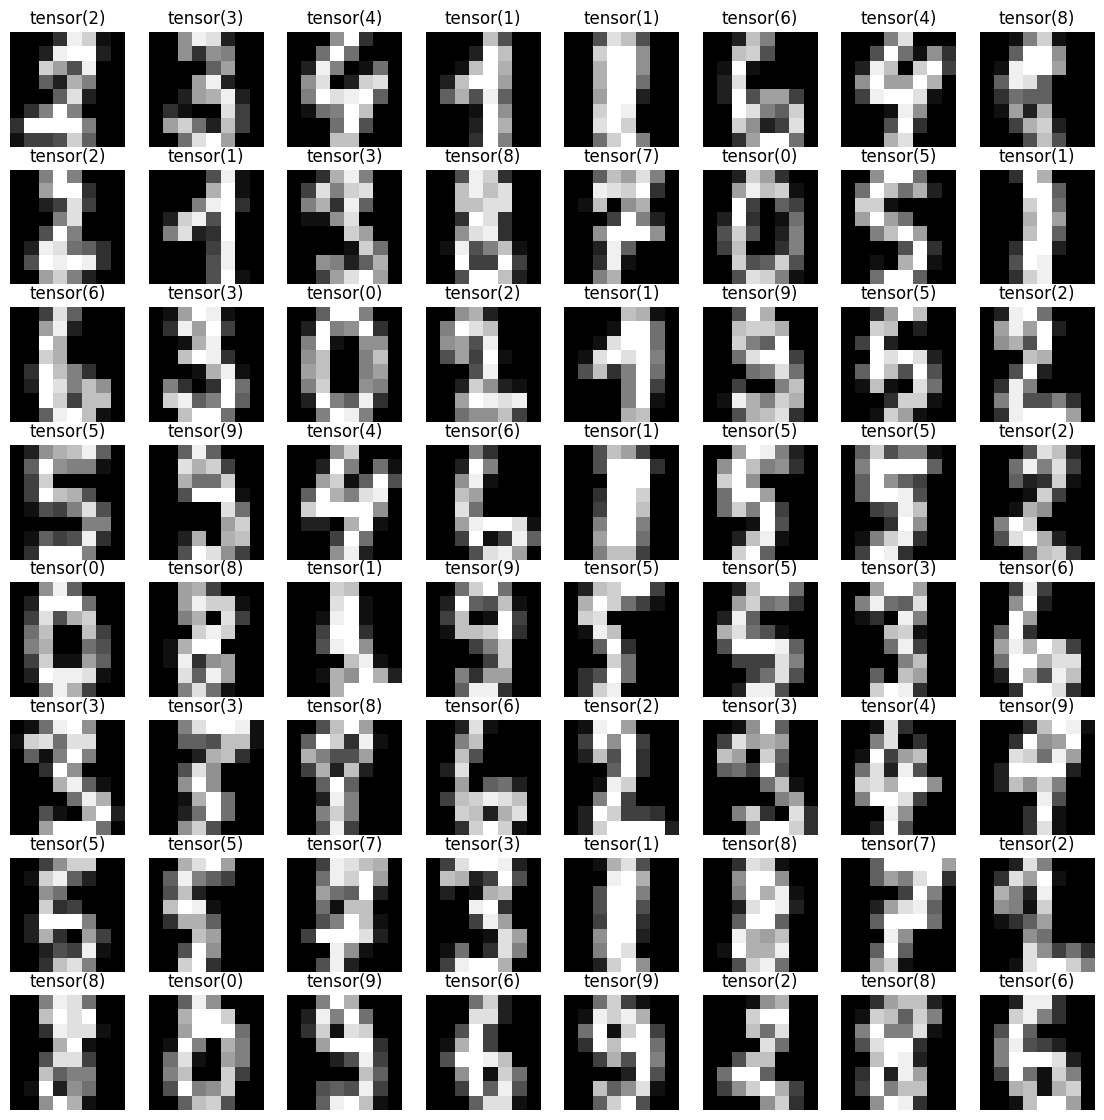

In [9]:
imgs, labels = next(iter(loader)) #이터레이터로 만들어주기 (반복문으로 쓸 수 있음)
# 64개 이미지, 64개 라벨 하나 빼줌

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

In [10]:
model = nn.Sequential(
    nn.Linear(64, 10) #64개를 입력받아서 10개(0부터 9까지 확률)를 내보내줘야함
)

# 다항 로지스틱 회귀이기 때문에 softmax를 loss함수에 껴주면 된다.

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [12]:
epochs = 100
for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/100 Loss: 0.001771 Accuracy: 100.00%
Epoch    1/100 Loss: 0.001811 Accuracy: 100.00%
Epoch    2/100 Loss: 0.001953 Accuracy: 100.00%
Epoch    3/100 Loss: 0.001750 Accuracy: 100.00%
Epoch    4/100 Loss: 0.001704 Accuracy: 100.00%
Epoch    5/100 Loss: 0.001666 Accuracy: 100.00%
Epoch    6/100 Loss: 0.001619 Accuracy: 100.00%
Epoch    7/100 Loss: 0.001696 Accuracy: 100.00%
Epoch    8/100 Loss: 0.001890 Accuracy: 100.00%
Epoch    9/100 Loss: 0.001555 Accuracy: 100.00%
Epoch   10/100 Loss: 0.001585 Accuracy: 100.00%
Epoch   11/100 Loss: 0.001619 Accuracy: 100.00%
Epoch   12/100 Loss: 0.001655 Accuracy: 100.00%
Epoch   13/100 Loss: 0.001970 Accuracy: 100.00%
Epoch   14/100 Loss: 0.002779 Accuracy: 100.00%
Epoch   15/100 Loss: 0.002076 Accuracy: 100.00%
Epoch   16/100 Loss: 0.001823 Accuracy: 100.00%
Epoch   17/100 Loss: 0.001459 Accuracy: 100.00%
Epoch   18/100 Loss: 0.001560 Accuracy: 100.00%
Epoch   19/100 Loss: 0.001437 Accuracy: 100.00%
Epoch   20/100 Loss: 0.001402 Accuracy: 

tensor(5)


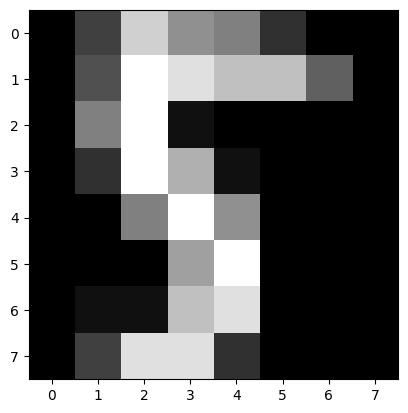

In [13]:
plt.imshow(x_test[10].reshape((8, 8)), cmap='gray')
print(y_test[10])

In [14]:
y_pred = model(x_test)
y_pred[10]

tensor([-11.9953, -17.4674,  -9.7753,  -3.2766, -17.3257,  15.2174, -14.1358,
         -1.5109,  -0.7596, -18.6053], grad_fn=<SelectBackward0>)

In [15]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([1.5194e-12, 6.3855e-15, 1.3990e-11, 9.2934e-09, 7.3572e-15, 1.0000e+00,
        1.7868e-13, 5.4325e-08, 1.1515e-07, 2.0464e-15],
       grad_fn=<SelectBackward0>)

In [16]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[10][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 1.00
숫자 6일 확률: 0.00
숫자 7일 확률: 0.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00


In [19]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다.')

테스트 정확도는  96.67% 입니다.
